# Pascal VOC

Введение в набор данных Pascal VOC

https://russianblogs.com/article/31471481953/

## Pascal VOC 2007

In [ ]:
import json
with open('/content/pascal_test2007.json', 'r') as f:
  voc_2007_json = json.load(f)
print(voc_2007_json.keys())
for key in voc_2007_json.keys():
  print(key, voc_2007_json[key][0])
  if key=="annotations":
    for key2 in voc_2007_json[key][0].keys():
      print("--> ", key2, voc_2007_json[key][0][key2])


## Pascal Voc 20012

In [35]:
import xml.etree.ElementTree as ET
tree = ET.parse('/content/2007_000027.xml')
root = tree.getroot()

In [ ]:
!cat /content/2007_000027.xml

<annotation>
	<folder>VOC2012</folder>
	<filename>2007_000027.jpg</filename>
	<source>
		<database>The VOC2007 Database</database>
		<annotation>PASCAL VOC2007</annotation>
		<image>flickr</image>
	</source>
	<size>
		<width>486</width>
		<height>500</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>person</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>174</xmin>
			<ymin>101</ymin>
			<xmax>349</xmax>
			<ymax>351</ymax>
		</bndbox>
		<part>
			<name>head</name>
			<bndbox>
				<xmin>169</xmin>
				<ymin>104</ymin>
				<xmax>209</xmax>
				<ymax>146</ymax>
			</bndbox>
		</part>
		<part>
			<name>hand</name>
			<bndbox>
				<xmin>278</xmin>
				<ymin>210</ymin>
				<xmax>297</xmax>
				<ymax>233</ymax>
			</bndbox>
		</part>
		<part>
			<name>foot</name>
			<bndbox>
				<xmin>273</xmin>
				<ymin>333</ymin>
				<xmax>297</xmax>
				<ymax>354</ymax>
			</bndbox>
		</part>
		<part>
			<name>foot<

In [31]:
def print_recursive(child, l=0):
  print("-->"*l, child.tag, end=" " )
  if child.text.strip():
    print(child.text)
  else:
    print()
    for ch in child:
      print_recursive(ch, l+1)


In [36]:
for child in root:
  print_recursive(child)

 folder VOC2007
 filename 000027.jpg
 source 
--> database The VOC2007 Database
--> annotation PASCAL VOC2007
--> image flickr
--> flickrid 318280413
 owner 
--> flickrid Kyrielle
--> name Laura
 size 
--> width 486
--> height 500
--> depth 3
 segmented 0
 object 
--> name person
--> pose Unspecified
--> truncated 0
--> difficult 0
--> bndbox 
-->--> xmin 174
-->--> ymin 101
-->--> xmax 349
-->--> ymax 351
--> part 
-->--> name head
-->--> bndbox 
-->-->--> xmin 169.8029
-->-->--> ymin 104.3274
-->-->--> xmax 208.0765
-->-->--> ymax 145.8583
--> part 
-->--> name hand
-->--> bndbox 
-->-->--> xmin 278.9235
-->-->--> ymin 210.1906
-->-->--> xmax 296.8388
-->-->--> ymax 232.9919
--> part 
-->--> name foot
-->--> bndbox 
-->-->--> xmin 273.2231
-->-->--> ymin 333.9691
-->-->--> xmax 296.0244
-->-->--> ymax 353.513
--> part 
-->--> name foot
-->--> bndbox 
-->-->--> xmin 319.6401
-->-->--> ymin 307.9104
-->-->--> xmax 339.184
-->-->--> ymax 325.8257


# COCO

In [30]:
!pip install fiftyone

## Download the dataset

coco-2017 val-dataset - 5,000 images, that are each paired with five different captions.

In [ ]:
!python --version

Python 3.7.12


In [ ]:
#!pip install pip --upgrade
#!pip install urllib3 --upgrade
# Collecting urllib3<1.27,>=1.25.4
!pip install urllib3==1.25.4

In [23]:
import fiftyone as fo
import fiftyone.zoo as foz
# GPU
# List available zoo datasets
print(foz.list_zoo_datasets())
#foz.datasets.list_zoo_datasets()
#foz.datasets.load_zoo_dataset_info()

['bdd100k', 'caltech101', 'caltech256', 'cifar10', 'cifar100', 'cityscapes', 'coco-2014', 'coco-2017', 'fashion-mnist', 'hmdb51', 'imagenet-2012', 'imagenet-sample', 'kitti', 'lfw', 'mnist', 'open-images-v6', 'quickstart', 'quickstart-geo', 'quickstart-video', 'ucf101', 'voc-2007', 'voc-2012']


In [38]:
import fiftyone as fo
import fiftyone.zoo as foz
# CPU
# List available zoo datasets
print(foz.list_zoo_datasets())
foz.datasets.list_zoo_datasets()
#foz.datasets.load_zoo_dataset_info('cifar10')

['bdd100k', 'caltech101', 'caltech256', 'cifar10', 'cifar100', 'cityscapes', 'coco-2014', 'coco-2017', 'fashion-mnist', 'hmdb51', 'imagenet-2012', 'imagenet-sample', 'kitti', 'lfw', 'mnist', 'open-images-v6', 'quickstart', 'quickstart-geo', 'quickstart-video', 'ucf101', 'voc-2007', 'voc-2012']


['bdd100k',
 'caltech101',
 'caltech256',
 'cifar10',
 'cifar100',
 'cityscapes',
 'coco-2014',
 'coco-2017',
 'fashion-mnist',
 'hmdb51',
 'imagenet-2012',
 'imagenet-sample',
 'kitti',
 'lfw',
 'mnist',
 'open-images-v6',
 'quickstart',
 'quickstart-geo',
 'quickstart-video',
 'ucf101',
 'voc-2007',
 'voc-2012']

In [42]:
# Load the COCO-2017 validation split into a FiftyOne dataset
dataset = foz.load_zoo_dataset("coco-2017", split="validation", 
                                dataset_dir="coco-2017") 
dataset.name = "coco-2017-val"
dataset.persistent = True

Found annotations at 'coco-2017/raw/instances_val2017.json'
Images already downloaded
Existing download of split 'validation' is sufficient
Loading existing dataset 'coco-2017-validation'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


## Data Explore var 1

In [62]:
# Visualize the in the App
session = fo.launch_app(dataset)

## Data Explore var 2

Используем API
https://cocodataset.org/#download

Throughout the API "ann"=annotation, "cat"=category, and "img"=image.

- getAnnIdsGet ann ids that satisfy given filter conditions. 
- getCatIdsGet cat ids that satisfy given filter conditions. 
- getImgIdsGet img ids that satisfy given filter conditions. 
- loadAnnsLoad anns with the specified ids. 
- loadCatsLoad cats with the specified ids. 
- loadImgsLoad imgs with the specified ids. 
- loadResLoad algorithm results and create API for accessing them. 
- showAnns Display the specified annotations.

и пример ноутбука

https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocoDemo.ipynb

COCO has 5 annotation types used for
- object detection
- keypoint detection
- stuff segmentation
- panoptic segmentation
- image captioning

https://towardsdatascience.com/coco-data-format-for-object-detection-a4c5eaf518c5


In [24]:
#%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import pandas as pd
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [ ]:
!cat /content/coco-2017/info.json

{
    "name": "coco-2017",
    "zoo_dataset": "fiftyone.zoo.datasets.base.COCO2017Dataset",
    "dataset_type": "fiftyone.types.dataset_types.COCODetectionDataset",
    "num_samples": 5000,
    "downloaded_splits": {
        "validation": {
            "split": "validation",
            "num_samples": 5000
        }
    },
    "classes": [
        "0",
        "person",
        "bicycle",
        "car",
        "motorcycle",
        "airplane",
        "bus",
        "train",
        "truck",
        "boat",
        "traffic light",
        "fire hydrant",
        "12",
        "stop sign",
        "parking meter",
        "bench",
        "bird",
        "cat",
        "dog",
        "horse",
        "sheep",
        "cow",
        "elephant",
        "bear",
        "zebra",
        "giraffe",
        "26",
        "backpack",
        "umbrella",
        "29",
        "30",
        "handbag",
        "tie",
        "suitcase",
        "frisbee",
        "skis",
        "snowboard",
 

In [13]:
import json
with open('/content/coco-2017/validation/labels.json', 'r') as f:
  labels_json = json.load(f)
print(labels_json.keys())
for key in labels_json.keys():
  print(key, len(labels_json[key]))
  if isinstance( labels_json[key], dict):
    for k in labels_json[key].keys():
      print("--> ", k, labels_json[key][k])
  if isinstance( labels_json[key], list):
    print(labels_json[key][0].keys())
  else:
    print(labels_json[key])

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])
info 6
-->  description COCO 2017 Dataset
-->  url http://cocodataset.org
-->  version 1.0
-->  year 2017
-->  contributor COCO Consortium
-->  date_created 2017/09/01
{'description': 'COCO 2017 Dataset', 'url': 'http://cocodataset.org', 'version': '1.0', 'year': 2017, 'contributor': 'COCO Consortium', 'date_created': '2017/09/01'}
licenses 8
dict_keys(['url', 'id', 'name'])
images 5000
dict_keys(['license', 'file_name', 'coco_url', 'height', 'width', 'date_captured', 'flickr_url', 'id'])
annotations 36781
dict_keys(['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id'])
categories 80
dict_keys(['supercategory', 'id', 'name'])


### Caption Annotations

In [14]:
# initialize COCO api for caption annotations
path_to_loading_images = "/content/coco-2017/validation/data"
path_to_loading_COCO = '/content/coco-2017/raw/'
dataType='val2017'
annFile=path_to_loading_COCO + f'captions_{dataType}.json'
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.06s)
creating index...
index created!


In [15]:
# Load image & annotations (captions) ids
imgIds = coco_caps.getImgIds()
annIds = coco_caps.getAnnIds()
len(imgIds), len(annIds)

(5000, 25014)

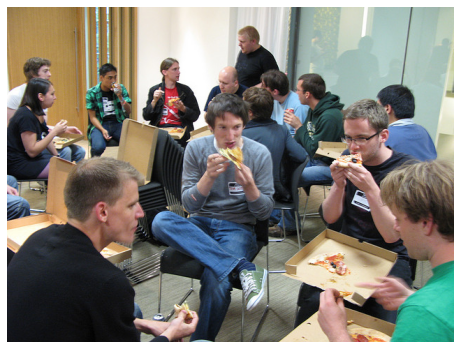

a group of people sitting together eating pizza
A large group of people are eating pizza in an office.
A group of people sitting around eating pizza together.
Fourteen college guys, and one woman, all eating pizza together.
A bunch of people are sitting together eating pizza and talking.


In [16]:
# load and display caption annotations - through API-interface
id = imgIds[np.random.randint(0,len(imgIds))]
#annIds = coco_caps.getAnnIds(imgIds=img['id'])
img = coco_caps.loadImgs(id)[0]
I = io.imread(img['coco_url'])
plt.imshow(I); plt.axis('off')
plt.show()

ann2img_ids = coco_caps.getAnnIds(id)
anns = coco_caps.loadAnns(ann2img_ids)
coco_caps.showAnns(anns)

In [ ]:
# Data explore for next preprocessing
ann_ids = coco_caps.loadAnns(annIds)
ann_ids_pd = pd.DataFrame(ann_ids)
ann_ids_pd.head(10)

image_id   id                                            caption
0    179765   38  A black Honda motorcycle parked in front of a ...
1    179765  182      A Honda motorcycle parked in a grass driveway
2    190236  401  An office cubicle with four different types of...
3    331352  441          A small closed toilet in a cramped space.
4    517069  447     Two women waiting at a bench next to a street.
5    179765  479  A black Honda motorcycle with a dark burgundy ...
6    331352  540  A tan toilet and sink combination in a small r...
7    190236  644  The home office space seems to be very cluttered.
8    182417  856  A beautiful dessert waiting to be shared by tw...
9    517069  882  A woman sitting on a bench and a woman standin...

In [ ]:
print( annIds[:10])
coco_caps.showAnns(ann_ids[:10])

[38, 182, 401, 441, 447, 479, 540, 644, 856, 882]
A black Honda motorcycle parked in front of a garage.
A Honda motorcycle parked in a grass driveway
An office cubicle with four different types of computers.
A small closed toilet in a cramped space.
Two women waiting at a bench next to a street.
A black Honda motorcycle with a dark burgundy seat.
A tan toilet and sink combination in a small room.
The home office space seems to be very cluttered.
A beautiful dessert waiting to be shared by two people
A woman sitting on a bench and a woman standing waiting for the bus.


In [ ]:
ann_ids_pd.loc[ann_ids_pd.image_id==179765]

NumExpr defaulting to 2 threads.


image_id    id                                            caption
0     179765    38  A black Honda motorcycle parked in front of a ...
1     179765   182      A Honda motorcycle parked in a grass driveway
5     179765   479  A black Honda motorcycle with a dark burgundy ...
44    179765  6638  Ma motorcycle parked on the gravel in front of...
46    179765  6803  A motorcycle with its brake extended standing ...

A man is in a kitchen making pizzas.
Man in apron standing on front of oven with pans and bakeware
A baker is working in the kitchen rolling dough.
A person standing by a stove in a kitchen.
A table with pies being made and a person standing near a wall with pots and pans hanging on the wall.
397133 [{'license': 4, 'file_name': '000000397133.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000397133.jpg', 'height': 427, 'width': 640, 'date_captured': '2013-11-14 17:02:52', 'flickr_url': 'http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg', 'id': 397133}]


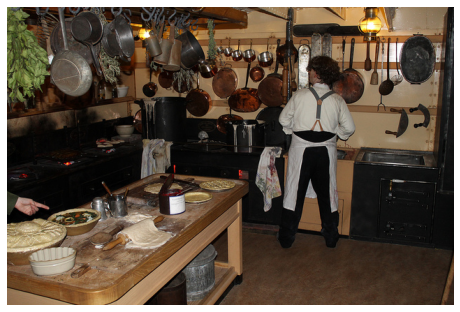

The dining table near the kitchen has a bowl of fruit on it.
A small kitchen has various appliances and a table.
The kitchen is clean and ready for us to see.
A kitchen and dining area decorated in white.
A kitchen that has a bowl of fruit on the table.
37777 [{'license': 1, 'file_name': '000000037777.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000037777.jpg', 'height': 230, 'width': 352, 'date_captured': '2013-11-14 20:55:31', 'flickr_url': 'http://farm9.staticflickr.com/8429/7839199426_f6d48aa585_z.jpg', 'id': 37777}]


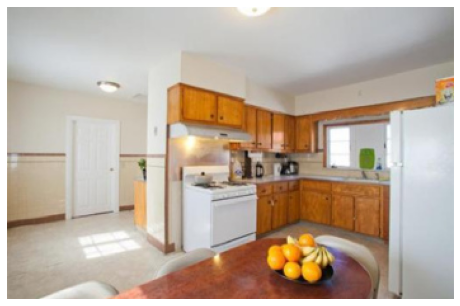

a person with a shopping cart on a city street 
City dwellers walk by as a homeless man begs for cash.
People walking past a homeless man begging on a city street
a homeless man holding a cup and standing next to a shopping cart on a street
People are walking on the street by a homeless person.
252219 [{'license': 4, 'file_name': '000000252219.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000252219.jpg', 'height': 428, 'width': 640, 'date_captured': '2013-11-14 22:32:02', 'flickr_url': 'http://farm4.staticflickr.com/3446/3232237447_13d84bd0a1_z.jpg', 'id': 252219}]


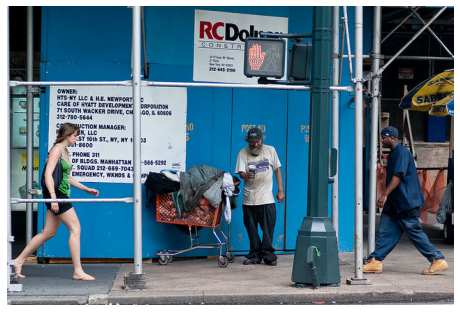

In [ ]:
for i, imgId in enumerate(imgIds):
  if i>2:
    break
  ann2img_ids = coco_caps.getAnnIds(imgId)
  anns = coco_caps.loadAnns(ann2img_ids)
  coco_caps.showAnns(anns)
  imgId_json = coco_caps.loadImgs(imgId)
  print(imgId, imgId_json)
  I = io.imread(imgId_json[0]['coco_url'])
  plt.axis('off')  
  plt.imshow(I)
  #I2 = io.imread(path_to_loading_images + img_json[0]['file_name'])
  #plt.imshow(I2)
  plt.show()
  

loading annotations into memory...
Done (t=0.05s)
creating index...
index created!


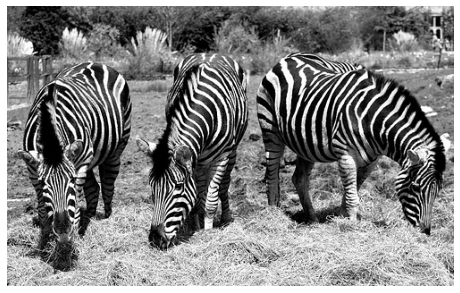

A trio of zebra's leaned over eating hay on the ground.
a few zebra are out in the open eating some hay
Three zebras are standing in a row grazing on hay.
Three zebras eat hay in black and white.
There are three zebras eating the grass and hay.


In [ ]:
# initialize COCO api for caption annotations
path_to_loading_images = '/root/fiftyone/coco-2017/validation/data/'
path_to_loading_COCO = '/content/coco-2017/raw/'
dataType='val2017'
annFile=path_to_loading_COCO + f'captions_{dataType}.json'
coco_caps=COCO(annFile)

# load and display caption annotations
id = imgIds[np.random.randint(0,len(imgIds))]
#annIds = coco_caps.getAnnIds(imgIds=img['id'])
img = coco_caps.loadImgs(id)[0]
I = io.imread(img['coco_url'])
plt.imshow(I); plt.axis('off')
plt.show()

annIds = coco_caps.getAnnIds(id)
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)

### Instance Annotations

In [25]:
# initialize COCO api for instance annotations
dataDir='/content' #'..'
path_to_loading_images = '/root/fiftyone/coco-2017/validation/data/'
path_to_loading_COCO = '/content/coco-2017/raw/'
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)
annFile=path_to_loading_COCO + f"instances_{dataType}.json"
coco_instance=COCO(annFile)

loading annotations into memory...
Done (t=0.98s)
creating index...
index created!


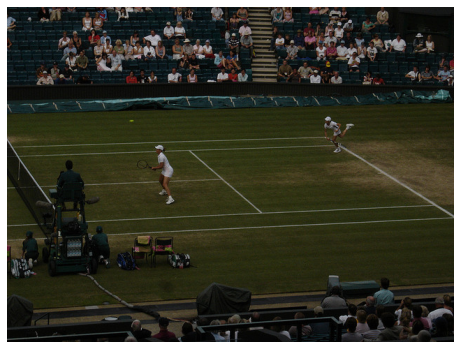

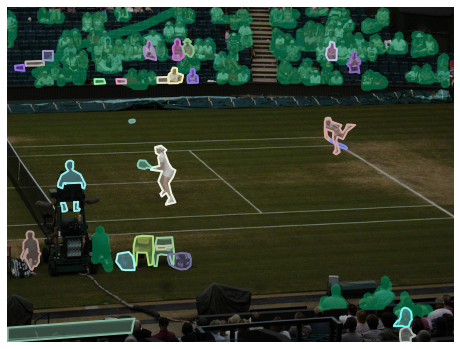

In [27]:
# load and display instance annotations
imgIds = coco_instance.getImgIds()
id = imgIds[np.random.randint(0,len(imgIds))]
#annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
annIds = coco_instance.getAnnIds(id)
anns = coco_instance.loadAnns(annIds)
#print(annIds)
img = coco_instance.loadImgs(id)[0]
I = io.imread(img['coco_url'])
plt.imshow(I); plt.axis('off')
plt.show()
plt.imshow(I); plt.axis('off')
coco_instance.showAnns(anns) #annIds)


### Object Detection Annotationa
in Instance Annotations

In [53]:
import json
with open ("/content/coco-2017/validation/labels.json", 'r') as f:
  labels_json = json.load(f)

In [54]:
labels_json.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [56]:
len(labels_json['annotations']) # labels_json['annotations'][0]

36781

In [3]:
import json
with open ("/content/coco-2017/raw/instances_val2017.json", 'r') as f:
  val_json = json.load(f)

In [4]:
val_json.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [6]:
len(val_json['annotations']), val_json['annotations'][0].keys()

(36781,
 dict_keys(['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id']))

In [44]:
len(val_json['images']), val_json['images'][0].keys(), val_json['images'][0]['id']

(5000,
 dict_keys(['license', 'file_name', 'coco_url', 'height', 'width', 'date_captured', 'flickr_url', 'id']),
 397133)

In [14]:
with open ("/content/coco-2017/info.json", "r") as f:
  info_json = json.load(f)
info_json.keys()  

dict_keys(['name', 'zoo_dataset', 'dataset_type', 'num_samples', 'downloaded_splits', 'classes'])

In [17]:
classes = info_json['classes']
len(classes), classes [:5], classes [-5:]

(91,
 ['0', 'person', 'bicycle', 'car', 'motorcycle'],
 ['vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'])

segmentation : [[510.66, 423.01, 511.72, 420.03, 510.45, 416.0, 510.34, 413.02, 510.77, 410.26, 510.77, 407.5, 510.34, 405.16, 511.51, 402.83, 511.41, 400.49, 510.24, 398.16, 509.39, 397.31, 504.61, 399.22, 502.17, 399.64, 500.89, 401.66, 500.47, 402.08, 499.09, 401.87, 495.79, 401.98, 490.59, 401.77, 488.79, 401.77, 485.39, 398.58, 483.9, 397.31, 481.56, 396.35, 478.48, 395.93, 476.68, 396.03, 475.4, 396.77, 473.92, 398.79, 473.28, 399.96, 473.49, 401.87, 474.56, 403.47, 473.07, 405.59, 473.39, 407.71, 476.68, 409.41, 479.23, 409.73, 481.56, 410.69, 480.4, 411.85, 481.35, 414.93, 479.86, 418.65, 477.32, 420.03, 476.04, 422.58, 479.02, 422.58, 480.29, 423.01, 483.79, 419.93, 486.66, 416.21, 490.06, 415.57, 492.18, 416.85, 491.65, 420.24, 492.82, 422.9, 493.56, 424.39, 496.43, 424.6, 498.02, 423.01, 498.13, 421.31, 497.07, 420.03, 497.07, 415.15, 496.33, 414.51, 501.1, 411.96, 502.06, 411.32, 503.02, 415.04, 503.33, 418.12, 501.1, 420.24, 498.98, 421.63, 500.47, 424.39, 505.03, 423.32, 

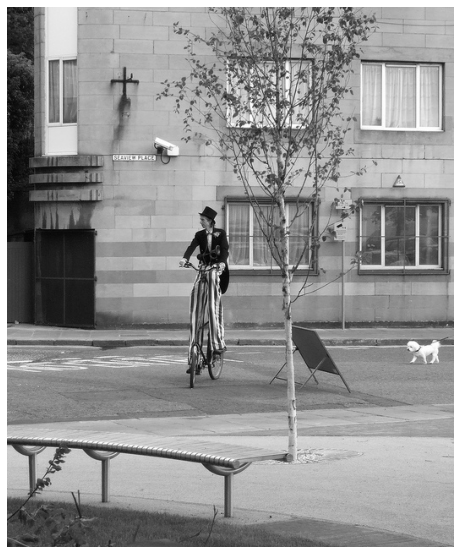

[1768, 201376, 575188, 2168354]
bbox : [473.07, 395.93, 38.65, 28.67] 
category_id : 18 : dog
id : 1768 


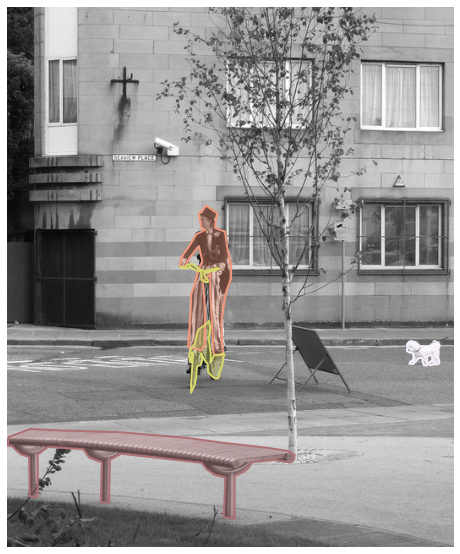

In [61]:
#id  = 397133
for key in val_json['annotations'][0].keys():
  print(key, ":", val_json['annotations'][0][key], ': ' + classes[val_json['annotations'][0][key]] if key=="category_id" else '')
  #if key=="id":
  if key=="image_id":
    id = val_json['annotations'][0][key]
    annIds = coco_instance.getAnnIds(id)
    anns = coco_instance.loadAnns(annIds)
    img = coco_instance.loadImgs(id)[0]
    I = io.imread(img['coco_url'])
    plt.imshow(I); plt.axis('off')
    plt.show()
    plt.imshow(I); plt.axis('off')
    coco_instance.showAnns(anns) #annIds)
    print(annIds)
    #for ann in annIds:
      #print(val_json['annotations'][ann])
      #print(val_json['id'][ann])
  if key == 'segmentation':
    print(len(val_json['annotations'][0][key]))

### Person Keypoints Annotations

In [24]:
# initialize COCO api for person keypoints annotations
dataDir='/content' #'..'
path_to_loading_images = '/root/fiftyone/coco-2017/validation/data/'
path_to_loading_COCO = '/content/coco-2017/raw/'
dataType='val2017'
#annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)
#annFile='{}/annotations/captions_{}.json'.format(dataDir,dataType)
annFile='{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
annFile= path_to_loading_COCO + f"person_keypoints_{dataType}.json"
coco_kps=COCO(annFile)



loading annotations into memory...
Done (t=0.74s)
creating index...
index created!


In [25]:
ann_ids = coco_kps.getAnnIds()
imgIds = coco_kps.getImgIds()

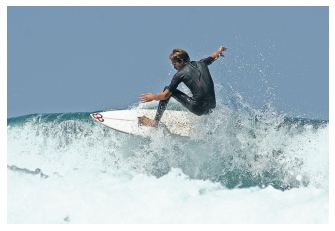

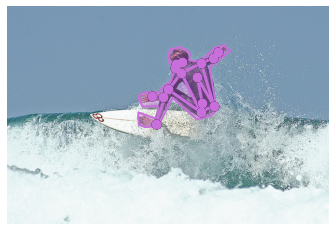

In [ ]:
# load and display keypoints annotations
id = imgIds[np.random.randint(0,len(imgIds))]
img = coco.loadImgs(id)[0]
I = io.imread(img['coco_url'])
plt.imshow(I); plt.axis('off')
plt.show()
plt.imshow(I); plt.axis('off')

ax = plt.gca()
#annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
annIds = coco_kps.getAnnIds(id)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

[{'segmentation': [[560.02, 420.26, 570.55, 321.65, 567.68, 247.94, 541.83, 172.31, 476.74, 106.26, 462.38, 97.64, 450.89, 51.69, 428.87, 21.06, 381.96, 16.27, 321.65, 56.48, 321.65, 78.5, 337.93, 110.09, 348.46, 124.45, 347.5, 137.85, 353.24, 149.34, 359.95, 149.34, 363.78, 154.13, 332.18, 177.1, 233.58, 242.2, 134.98, 318.78, 148.38, 350.37, 166.57, 358.99, 204.86, 376.22, 241.24, 343.67, 240.28, 343.67, 258.47, 336.01, 313.04, 316.87, 349.42, 295.81, 393.45, 280.49, 417.38, 349.42, 417.38, 368.56, 386.75, 420.26]], 'num_keypoints': 11, 'area': 87766.421, 'iscrowd': 0, 'keypoints': [350, 134, 2, 359, 127, 2, 0, 0, 0, 419, 116, 2, 0, 0, 0, 470, 187, 2, 384, 150, 2, 334, 281, 2, 321, 211, 2, 213, 322, 2, 187, 285, 2, 484, 398, 2, 435, 352, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'image_id': 566923, 'bbox': [134.98, 16.27, 435.57, 403.99], 'category_id': 1, 'id': 1230494}, {'segmentation': [[132.11, 285.28, 133.07, 234.54, 119.66, 186.67, 132.11, 155.08, 138.81, 136.89, 140.72, 120.62, 

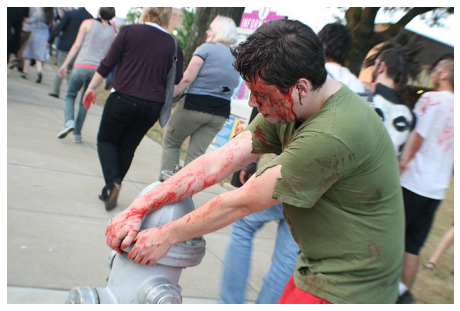

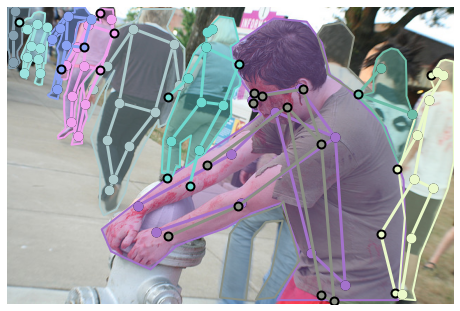

In [ ]:
#imgIds = coco_kps.getImgIds()
# load and display keypoints annotations
imgIds = coco_kps.getImgIds()
while True:
  id = imgIds[np.random.randint(0,len(imgIds))]
  annIds = coco_kps.getAnnIds(id)
  anns = coco_kps.loadAnns(annIds)
  if len(anns) >0:
    print(anns)
    #img = coco_kps.loadImgs(imgIds[10])
    img = coco_kps.loadImgs(id)[0]
    I = io.imread(img['coco_url'])
    plt.imshow(I); plt.axis('off')
    plt.show()
    plt.imshow(I); plt.axis('off')

    ax = plt.gca()
    #annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
    
    coco_kps.showAnns(anns)
    break

In [27]:

import json
with open('/content/coco-2017/raw/person_keypoints_val2017.json', 'r') as f:
  labels_json = json.load(f)
print(labels_json.keys())
for key in labels_json.keys():
  print(key, len(labels_json[key]))
  if isinstance( labels_json[key], dict):
    for k in labels_json[key].keys():
      print("--> ", k, labels_json[key][k])
  if isinstance( labels_json[key], list):
    print(labels_json[key][0].keys())
  else:
    print(labels_json[key])

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])
info 6
-->  description COCO 2017 Dataset
-->  url http://cocodataset.org
-->  version 1.0
-->  year 2017
-->  contributor COCO Consortium
-->  date_created 2017/09/01
{'description': 'COCO 2017 Dataset', 'url': 'http://cocodataset.org', 'version': '1.0', 'year': 2017, 'contributor': 'COCO Consortium', 'date_created': '2017/09/01'}
licenses 8
dict_keys(['url', 'id', 'name'])
images 5000
dict_keys(['license', 'file_name', 'coco_url', 'height', 'width', 'date_captured', 'flickr_url', 'id'])
annotations 11004
dict_keys(['segmentation', 'num_keypoints', 'area', 'iscrowd', 'keypoints', 'image_id', 'bbox', 'category_id', 'id'])
categories 1
dict_keys(['supercategory', 'id', 'name', 'keypoints', 'skeleton'])


10
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 142, 309, 1, 177, 320, 2, 191, 398, 2, 237, 317, 2, 233, 426, 2, 306, 233, 2, 92, 452, 2, 123, 468, 2, 0, 0, 0, 251, 469, 2, 0, 0, 0, 162, 551, 2]
[73.35, 206.02, 300.58, 372.5]


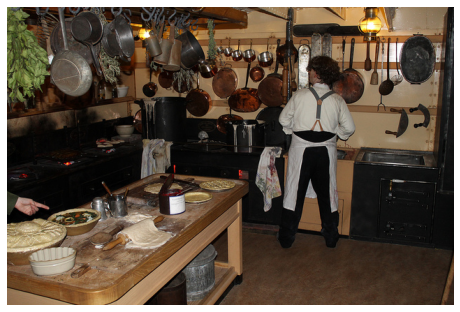

In [28]:
print(labels_json['annotations'][0]['num_keypoints'])
print(labels_json['annotations'][0]['keypoints'])
print(labels_json['annotations'][0]['bbox'])
I = io.imread(labels_json['images'][0]['coco_url'])
plt.imshow(I); plt.axis('off')
plt.show()